In [1305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn import svm


# For Model Building
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Загрузка и анализ набора данных

In [1306]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('/content/exercise_dataset.csv')

In [1307]:
# print the first 5 rows of the dataframe
calories.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,23.286113,Cloudy,3


In [1308]:
from sklearn.preprocessing import LabelEncoder

catcol = []
numcol = []

for col in calories_data.columns:
    if calories_data[col].dtype == 'object':
        catcol.append(col)
    else:
        numcol.append(col)


encoder = LabelEncoder()

for col in catcol:
    calories_data[col] = encoder.fit_transform(calories_data[col])

In [1309]:
calories_data.head()

,ID,Exercise,Calories Burn,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Exercise Intensity
0,1,1,286.959851,96.301115,45,0,37,170,-0.003731,5
1,2,7,343.453036,61.104668,25,0,43,142,-0.121653,5
2,3,0,261.223465,71.766724,20,0,20,148,0.121872,4
3,4,2,127.183858,82.984456,33,0,39,170,1.296172,10
4,5,8,416.318374,85.643174,29,1,34,118,-0.270706,3


In [1310]:
# checking the number of rows and columns
calories_data.shape

(3864, 10)

In [1311]:
# getting some informations about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  3864 non-null   int64  
 1   Exercise            3864 non-null   int64  
 2   Calories Burn       3864 non-null   float64
 3   Actual Weight       3864 non-null   float64
 4   Age                 3864 non-null   int64  
 5   Gender              3864 non-null   int64  
 6   Duration            3864 non-null   int64  
 7   Heart Rate          3864 non-null   int64  
 8   BMI                 3864 non-null   float64
 9   Exercise Intensity  3864 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 302.0 KB


In [1312]:
# checking for missing values
calories_data.isnull().sum()

ID                    0
Exercise              0
Calories Burn         0
Actual Weight         0
Age                   0
Gender                0
Duration              0
Heart Rate            0
BMI                   0
Exercise Intensity    0
dtype: int64

In [1313]:
# get some statistical measures about the data
calories_data.describe()

,ID,Exercise,Calories Burn,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Exercise Intensity
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,1932.500000,4.578675,301.861806,75.188440,39.621118,0.508282,40.190994,139.777950,0.206741,5.457298
std,1115.585048,2.861642,115.828604,14.845511,12.521721,0.499996,11.765957,23.447528,0.585282,2.850896
min,1.000000,0.000000,100.009403,45.783747,18.000000,0.000000,20.000000,100.000000,-0.445893,1.000000
25%,966.750000,2.000000,202.168837,62.476906,29.000000,0.000000,30.000000,119.000000,-0.246310,3.000000
50%,1932.500000,5.000000,299.742508,75.544407,40.000000,1.000000,40.000000,140.000000,0.005422,5.000000
75%,2898.250000,7.000000,404.143688,88.105767,51.000000,1.000000,51.000000,160.000000,0.481236,8.000000
max,3864.000000,9.000000,499.859262,104.309600,60.000000,1.000000,60.000000,180.000000,2.207881,10.000000


In [1314]:
sns.set()

<Axes: ylabel='count'>

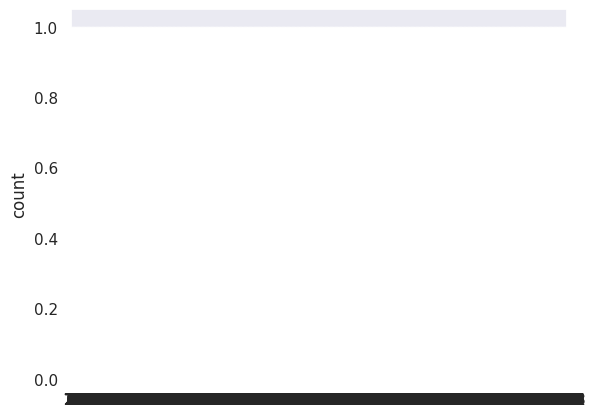

In [1315]:
# plotting the gender column in count plot
sns.countplot(calories_data['Gender'])

<Axes: xlabel='Age', ylabel='Density'>

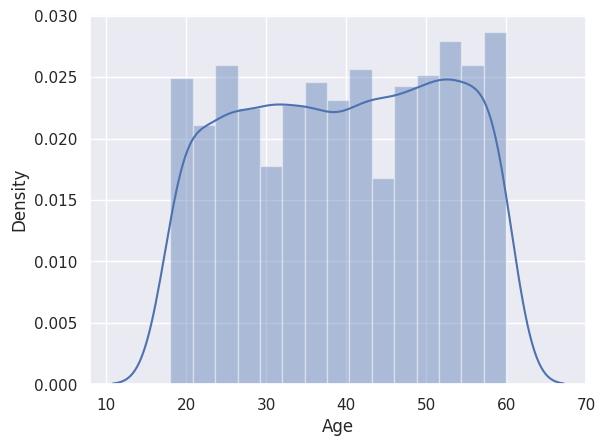

In [1316]:
# finding the distribution of "Age" column
sns.distplot(calories_data['Age'])

<Axes: xlabel='Actual Weight', ylabel='Density'>

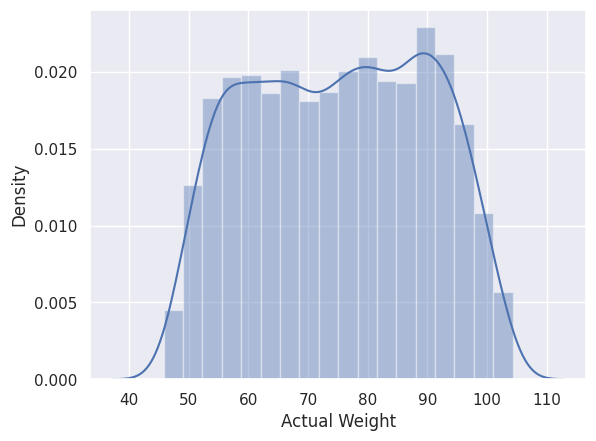

In [1317]:
# finding the distribution of "Actual Weight" column
sns.distplot(calories_data['Actual Weight'])

Нахождение корреляций

<Axes: xlabel='Heart Rate', ylabel='Density'>

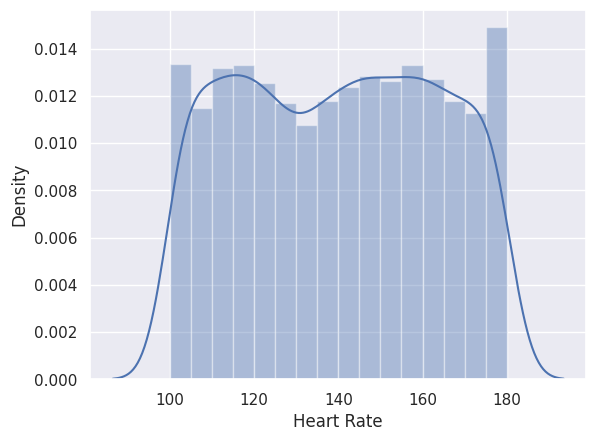

In [1345]:
# finding the distribution of "Heart Rate" column
sns.distplot(calories_data['Heart Rate'])

<Axes: >

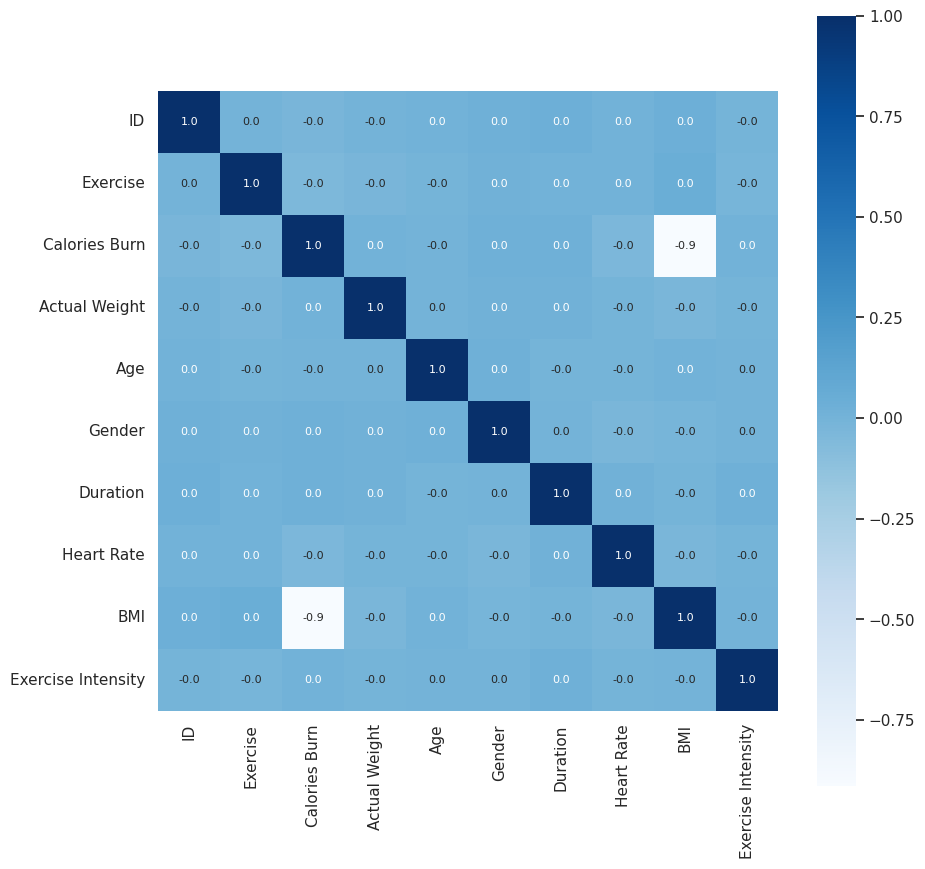

In [1319]:
# constructing a heatmap to understand the correlation
correlation = calories_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [1320]:
calories_data.head()

,ID,Exercise,Calories Burn,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Exercise Intensity
0,1,1,286.959851,96.301115,45,0,37,170,-0.003731,5
1,2,7,343.453036,61.104668,25,0,43,142,-0.121653,5
2,3,0,261.223465,71.766724,20,0,20,148,0.121872,4
3,4,2,127.183858,82.984456,33,0,39,170,1.296172,10
4,5,8,416.318374,85.643174,29,1,34,118,-0.270706,3


Подготовка данных

In [1321]:
X = calories_data.drop(columns=['ID','Calories Burn'], axis=1)
Y = calories_data['Calories Burn']

In [1322]:
print(X)

      Exercise  Actual Weight  Age  Gender  Duration  Heart Rate       BMI  \
0            1      96.301115   45       0        37         170 -0.003731   
1            7      61.104668   25       0        43         142 -0.121653   
2            0      71.766724   20       0        20         148  0.121872   
3            2      82.984456   33       0        39         170  1.296172   
4            8      85.643174   29       1        34         118 -0.270706   
...        ...            ...  ...     ...       ...         ...       ...   
3859         2      96.745133   20       1        22         139  0.987681   
3860         0      92.700573   21       1        49         160 -0.386114   
3861         0      96.778936   57       0        56         167  0.119887   
3862         4      68.662889   58       1        60         128  0.714797   
3863         7      59.833403   35       0        22         134  1.599518   

      Exercise Intensity  
0                      5  
1        

In [1323]:
print(Y)

0       286.959851
1       343.453036
2       261.223465
3       127.183858
4       416.318374
           ...    
3859    154.113144
3860    486.392768
3861    264.307731
3862    185.951870
3863    116.360417
Name: Calories Burn, Length: 3864, dtype: float64


Разделение на тестовую и обучающую выборки

In [1324]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [1325]:
model2=LinearRegression()

model2.fit (X_train, Y_train)


LinearRegression()

In [1326]:

y_pred = model2.predict(X)


for i in range(3864):
  calories['BMI'][i]=float(y_pred[i] - Y[i])/float(Y[i])



Преобразование текстовых данных в числовые

In [1327]:
from sklearn.preprocessing import LabelEncoder

catcol = []
numcol = []

for col in calories_data.columns:
    if calories_data[col].dtype == 'object':
        catcol.append(col)
    else:
        numcol.append(col)


encoder = LabelEncoder()

for col in catcol:
    calories_data[col] = encoder.fit_transform(calories_data[col])

In [1328]:
X = calories_data.drop(columns=['ID','Calories Burn'], axis=1)
Y = calories_data['Calories Burn']

In [1329]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [1341]:
len(X_train)

3091

In [1343]:
len(Y_test)

773

In [1330]:
model2=LinearRegression()

model2.fit (X_train, Y_train)

Y_pred = model2.predict(X_test)
print("Средний процент ошибки:  ",100*metrics.mean_absolute_percentage_error(Y_test, Y_pred)," %")
print("Среднее модуля ошибки:  ",metrics.mean_absolute_error(Y_test, Y_pred))

Средний процент ошибки:   16.90757791481567  %
Среднее модуля ошибки:   40.10673258050108


In [1331]:

model1=svm.SVR()

model1.fit (X_train, Y_train)

Y_pred = model1.predict(X_test)
print("Средний процент ошибки:  ",100*metrics.mean_absolute_percentage_error(Y_test, Y_pred)," %")
print("Среднее модуля ошибки:  ",metrics.mean_absolute_error(Y_test, Y_pred))

Средний процент ошибки:   43.315566853808235  %
Среднее модуля ошибки:   98.30995156817839


In [1332]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

In [1333]:
X_train, X_test, Y_train, Y_test = train_test_split(standardized_data, Y, test_size=0.2, random_state=2)

In [1334]:
calories.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,Age,Gender,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,45,Male,37,170,0.139759,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,25,Male,43,142,0.047860,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,20,Male,20,148,0.184758,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,33,Male,39,170,-0.271438,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,29,Female,34,118,-0.054840,Cloudy,3


In [1335]:

model1=svm.SVR()

model1.fit (X_train, Y_train)

Y_pred = model1.predict(X_test)
print("Средний процент ошибки:  ",100*metrics.mean_absolute_percentage_error(Y_test, Y_pred)," %")
print("Среднее модуля ошибки:  ",metrics.mean_absolute_error(Y_test, Y_pred))

Средний процент ошибки:   15.04125047780825  %
Среднее модуля ошибки:   45.48745973996564


In [1336]:

model1=svm.SVR(C=2000.0)

model1.fit (X_train, Y_train)

Y_pred = model1.predict(X_test)
print("Средний процент ошибки:  ",100*metrics.mean_absolute_percentage_error(Y_test, Y_pred)," %")
print("Среднее модуля ошибки:  ",metrics.mean_absolute_error(Y_test, Y_pred))


Средний процент ошибки:   2.4260882922471074  %
Среднее модуля ошибки:   6.140307775765209


In [1337]:

model1=svm.SVR(gamma=0.1,C=2000.0)

model1.fit (X_train, Y_train)

Y_pred = model1.predict(X_test)
print("Средний процент ошибки:  ",100*metrics.mean_absolute_percentage_error(Y_test, Y_pred)," %")
print("Среднее модуля ошибки:  ",metrics.mean_absolute_error(Y_test, Y_pred))

Средний процент ошибки:   2.232374745544809  %
Среднее модуля ошибки:   5.750067438504869


Формат ввода параметров: номер упражнения, вес, возраст, пол, продолжительность, пульс, индекс массы тела, интенсивность

In [1338]:
Y_predOne = model1.predict([[1,60,30,0,30,140,0.12,5]])




print("Ожидаемый расход калорий: ",Y_predOne[0])

Ожидаемый расход калорий:  403.4349138601307


In [1344]:
regression_metrics_df = pd.DataFrame({
    "Погрешность SVR": ["MeanAbs(kcal)", "MeanAbsPercent(%)"],
    "Начальная":[98.3,43.3],
    "Масштабирование": [45.4,15],
    "Подбор C":[6.14,2.43],
    "Подбор gamma": [5.75,2.23]
})

regression_metrics_df.set_index('Погрешность SVR', inplace=True)
regression_metrics_df

,Начальная,Масштабирование,Подбор C,Подбор gamma
Погрешность SVR,,,,
MeanAbs(kcal),98.3,45.4,6.14,5.75
MeanAbsPercent(%),43.3,15.0,2.43,2.23
